In [2]:
import os
os.chdir('..')

In [3]:
import torch
import pickle
import numpy as np

from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _plot_approx_ratios_all, _plot_approx_ratios

%load_ext autoreload
%autoreload 2

In [4]:
device = torch.device('cuda:6' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN_large_10_6', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:6


## Size generalization experiment

#### Evaluate CRs for all graph configurations across different graph sizes

In [6]:
import gc # TODO remove
rng = np.random.default_rng(seed=0)
num_trials = 150
batch_size = 500
graph_configs = MAIN_TESTING_GRAPH_CONFIGS
node_configs = EXPERIMENT_SIZE_GENERALIZATION_REGIMES[1:]
print(node_configs)
sizes = [x+y for (x,y) in node_configs]
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {'rng': rng}
}

data = [[] for _ in range(len(graph_configs))]



for i, node_config in enumerate(node_configs):
    for data_index, graph_config in enumerate(graph_configs):
        print(node_config, graph_config)
        
        instances = sample_instances(
            *node_config,
            num_trials,
            rng,
            args.__dict__,
            **graph_config
        )

        cr_ratios, _ = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'greedy_t', 'lp_rounding'],
            **baselines_kwargs
        )
        data[data_index].append(cr_ratios)
    

        with open(f"experiments/size_generalization_main1.pickle", 'wb') as handle:
            pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

        gc.collect()
        torch.cuda.empty_cache()

[(24, 12), (28, 14), (32, 16), (36, 18), (40, 20), (44, 22), (48, 24), (52, 26), (56, 28), (60, 30), (64, 32), (68, 34), (72, 36), (76, 38), (80, 40), (84, 42), (88, 44), (92, 46), (96, 48), (100, 50), (104, 52), (108, 54), (112, 56), (116, 58), (120, 60), (124, 62), (128, 64), (132, 66), (136, 68), (140, 70), (144, 72), (148, 74), (152, 76), (156, 78), (160, 80), (164, 82), (168, 84), (172, 86), (176, 88), (180, 90), (184, 92), (188, 94), (192, 96), (196, 98), (200, 100), (204, 102), (208, 104), (212, 106), (216, 108), (220, 110), (224, 112), (228, 114), (232, 116), (236, 118), (240, 120), (244, 122), (248, 124), (252, 126), (256, 128), (260, 130), (264, 132), (268, 134), (272, 136), (276, 138), (280, 140), (284, 142), (288, 144), (292, 146), (296, 148), (300, 150), (304, 152), (308, 154), (312, 156), (316, 158), (320, 160), (324, 162), (328, 164), (332, 166), (336, 168), (340, 170), (344, 172), (348, 174), (352, 176), (356, 178), (360, 180), (364, 182), (368, 184), (372, 186), (376, 

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(28, 14) {'graph_type': 'GM'}


/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(32, 16) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(36, 18) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(40, 20) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(44, 22) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(48, 24) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(52, 26) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(56, 28) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(60, 30) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(64, 32) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(68, 34) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(72, 36) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(76, 38) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(80, 40) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(84, 42) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(88, 44) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(92, 46) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(96, 48) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(100, 50) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(104, 52) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(108, 54) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(112, 56) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(116, 58) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

RuntimeError: CUDA out of memory. Tried to allocate 836.00 MiB (GPU 6; 11.78 GiB total capacity; 10.08 GiB already allocated; 554.06 MiB free; 10.10 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

#### Generate size generalization plots

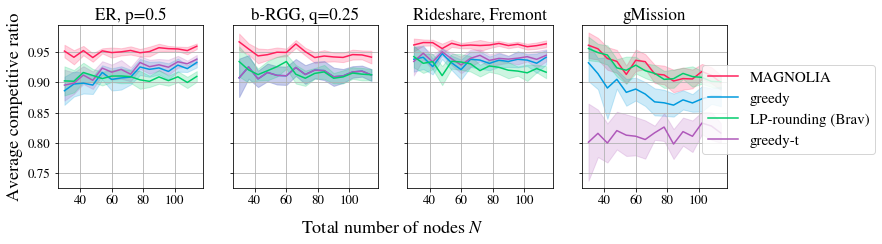

In [ ]:
from util import _plot_approx_ratios

with open(f"experiments/size_generalization_main.pickle", 'rb') as handle:
    results = pickle.load(handle)

filtered_results = {frozenset(g.items()): data for g, data in zip(graph_configs, results)}
_plot_approx_ratios(sizes, filtered_results, x_axis_name= "Total number of nodes $N$", confidence = 0.95)